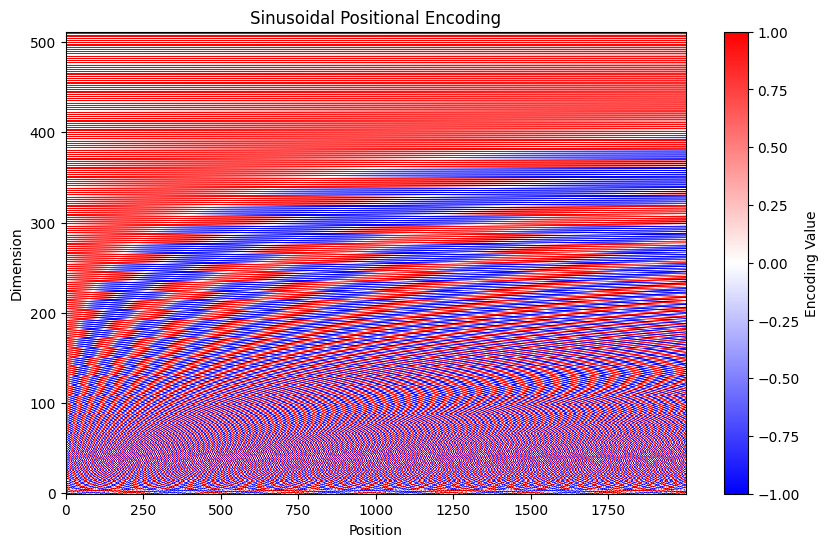

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(max_len=100, d_model=64):
    """
    Compute the sinusoidal positional encoding matrix.

    Args:
        max_len (int): Maximum input sequence length (number of positions).
        d_model (int): Embedding dimension.
    
    Returns:
        numpy.ndarray of shape (max_len, d_model) containing the positional encodings.
    """
    # Initialize the positional encoding matrix
    pos_encoding = np.zeros((max_len, d_model))
    
    # Create an array of positions [0, 1, 2, ..., max_len-1]
    positions = np.arange(max_len)[:, np.newaxis]  # shape: (max_len, 1)
    
    # Create an array of dimension indices [0, 1, 2, ..., d_model-1]
    # for the even dimensions (0, 2, 4, ...)
    # we apply sin; for the odd dimensions (1, 3, 5, ...)
    # we apply cos.
    
    # Compute the scaling factor for each dimension (even indices)
    #  (logarithmic spacing)
    # If i is the dimension index, we compute:
    #   10000^(-2i / d_model) for the even i, then sin for even i, cos for i+1
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    
    # Apply sin to even indices [0, 2, 4, ...]
    pos_encoding[:, 0::2] = np.sin(positions * div_term)
    
    # Apply cos to odd indices [1, 3, 5, ...]
    pos_encoding[:, 1::2] = np.cos(positions * div_term)
    
    return pos_encoding

def plot_positional_encoding(max_len=100, d_model=64):
    """
    Plot the positional encoding as a heatmap with:
    - X-axis: position
    - Y-axis: dimension
    - Color map: red/white/blue centered at 0
    """
    pe_matrix = positional_encoding(max_len, d_model)
    
    plt.figure(figsize=(10, 6))
    # Transpose so that "dimension" is on the y-axis
    plt.imshow(pe_matrix.T, aspect='auto', cmap='bwr', 
               origin='lower',
               interpolation='nearest')
    
    plt.xlabel("Position")
    plt.ylabel("Dimension")
    plt.title("Sinusoidal Positional Encoding")
    
    # Add colorbar to see negative/positive values
    cbar = plt.colorbar()
    cbar.set_label("Encoding Value")
    
    plt.show()


if __name__ == "__main__":
    # You can adjust max_len and d_model as you prefer
    plot_positional_encoding(max_len=2000, d_model=512)
